**ABHIJEET KUMAR**
-**Predict the percentage of an student based on the no. of study hours.**

In [28]:
#IMporting all the important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
#loading dataset
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(url)

In [30]:
#First 5 rows of dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [67]:
#last 5 rows of dataset
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [69]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [71]:
#Checking for null value
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Plotting the distribution**


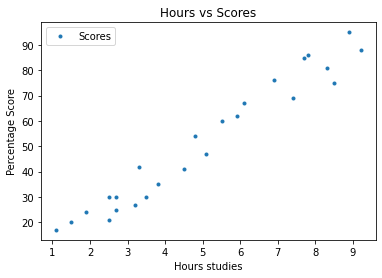

In [37]:
df.plot(x='Hours', y='Scores',style='.')
plt.title('Hours vs Scores')
plt.xlabel('Hours studies')
plt.ylabel('Percentage Score')
plt.show()

**perperation of given data**

In [39]:
#dividing the data into attribute(input) and label(output)
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [42]:
#spliting this data into training and test set using scikit-learn built in train_test_split() method
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

**To Train algorithm**

In [47]:
#spliting of data in training and testing sets is done and now finally the time to train our algorithm
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print('Training complete')

Training complete


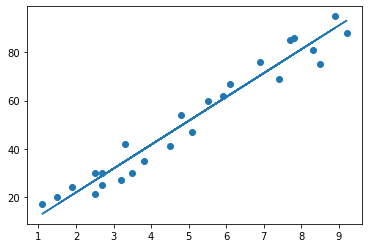

In [51]:
#ploting the regression line
line=regressor.coef_*x+regressor.intercept_

#ploting test data
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

**Making Prediction**

In [74]:
#some prediction after the algorithm is trained
print(x_test)#Testing data in Hours
y_pred=regressor.predict(x_test)#predicting the score

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [75]:
#comparing Actual vs Predicted
df1=pd.DataFrame({'Actual':y_test,'Predicted': y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Predicting score if a student studies for 9.25 hrs/day**

In [76]:
hours=np.array(9.25)
hours=hours.reshape(-1,1)
pred=regressor.predict(hours)
print("No of hours = {}".format(hours))
print("Predicted score={}".format(pred[0]))

No of hours = [[9.25]]
Predicted score=93.69173248737538


**Evauating the model**

In [77]:
#the final step is to evaluate the performance of algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975


**conclusion**

**From the above we have seen that the predicting score of the model is 93.69 with mean absolute error 4.18  which is pretty much accurate**